<h1 align="center"><font color="pink">Aplicando Pandas com Funções</font></h1>

<font color="yellow">Data Scientist.: Dr. Eddy Giusepe Chirinos Isidro</font>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/brandynewanek/data/main/dino.csv')

df.head()

,height,teeth size,tail length,dino
0,3.244112,18.865971,13.713091,2
1,15.391455,2.115573,20.942076,3
2,14.625879,4.168479,22.010666,3
3,5.574288,21.108127,14.003040,2
4,15.675385,6.361126,7.721574,1


In [2]:
df.shape

(1000, 4)

<font color="orange">Crie uma categoria alta, média e baixa.</font>

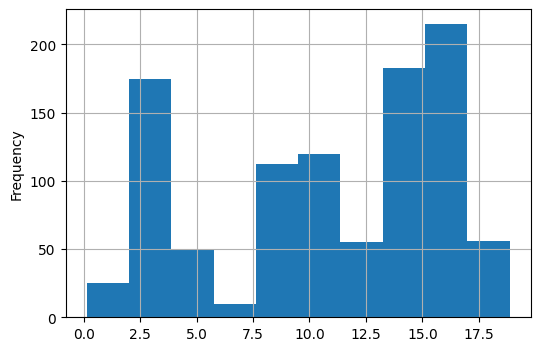

In [3]:
plt.figure(figsize=(6, 4))
df["height"].plot(kind="hist")
plt.grid(True)
plt.show()


In [4]:
# Criamos uma função:

def height_buckets(x):
  """
    Classifica a altura em categorias com base nos valores.

    Parâmetros:
    x (float): Um número representando a altura.

    Retorna:
    str: Uma string indicando a categoria da altura ('low', 'medium' ou 'high').

    Exemplo:
    * height_buckets(6)
    'low'
    * height_buckets(10)
    'medium'
    * height_buckets(15)
    'high'
  """
  if x < 7.5:
    value = 'low'
  elif x > 12.5:
    value='high'
  else:
    value = 'medium'
  return value # Não esqueça de retornar a categoria

In [5]:
# Aplicamos a função:

df["height_cat"] = df["height"].apply(height_buckets)

In [6]:
df.head()

,height,teeth size,tail length,dino,height_cat
0,3.244112,18.865971,13.713091,2,low
1,15.391455,2.115573,20.942076,3,high
2,14.625879,4.168479,22.010666,3,high
3,5.574288,21.108127,14.003040,2,low
4,15.675385,6.361126,7.721574,1,high


In [7]:
df['height_cat'].value_counts()

height_cat
high      484
medium    259
low       257
Name: count, dtype: int64

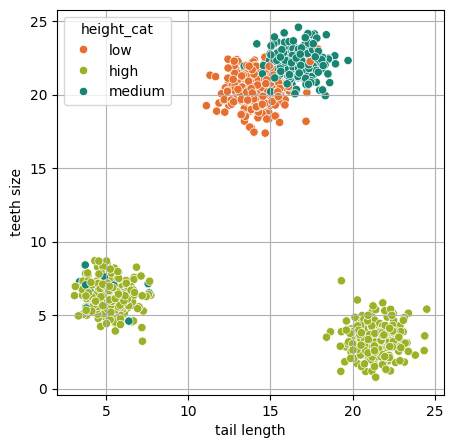

In [8]:
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.scatterplot(data=df,
                x='tail length',
                y='teeth size',
                hue='height_cat', # Usado para mapear variáveis categóricas para diferentes cores no gráfico de dispersão.
                palette=['#E56F2F', '#9CB126', '#188573']
               )
plt.grid(True)
plt.show()


<font color="orange">Rotule as anomalias medium</font>

In [9]:
# Criamos uma função:

def label_anomalies(x):
  # print(x)
  if x.iloc[0] == 'medium':
    if x.iloc[1] < 10:
      value = 'anomaly'
    else:
      value = 'normal'
  else:
    value = 'normal'
  return value

In [10]:
df['anomaly'] = df[['height_cat', 'teeth size']].apply(label_anomalies, axis=1)

df['anomaly'].value_counts()

anomaly
normal     983
anomaly     17
Name: count, dtype: int64

<font color="orange">Categoria de altura conjunta para anomalia</font>

In [11]:
def join_string2(s):
  """ Ligeira mudança no item acima """
  joined_string = s.iloc[0] + " " + s.iloc[1]

  return joined_string

In [12]:
df['anomaly'] = df[['height_cat', 'anomaly']].apply(join_string2, axis=1)

df['anomaly'].value_counts()

anomaly
high normal       484
low normal        257
medium normal     242
medium anomaly     17
Name: count, dtype: int64

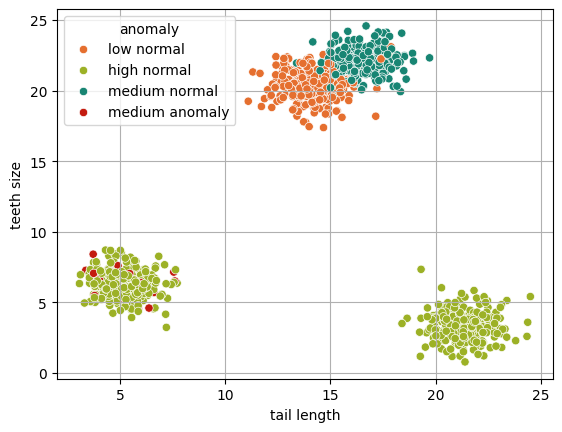

In [13]:
sns.scatterplot(data=df,
                x='tail length',
                y='teeth size',
                hue='anomaly',
                palette=['#E56F2F', '#9CB126', '#188573', '#C31B0F']
               )
plt.grid(True)
plt.show()
